In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Paths to your dataset folders
train_image_folder = './archive (19)/C2A_Dataset/new_dataset3/train/images'
train_label_folder =  './archive (19)/C2A_Dataset/new_dataset3/train/labels/'

test_image_folder = './archive (19)/C2A_Dataset/new_dataset3/test/images'
test_label_folder =  './archive (19)/C2A_Dataset/new_dataset3/test/labels/'

In [3]:

# Function to count files in a directory
def count_files_in_directory(directory):
    return len([file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))])

# Count images and labels in train and test folders
train_image_count = count_files_in_directory(train_image_folder)
train_label_count = count_files_in_directory(train_label_folder)

test_image_count = count_files_in_directory(test_image_folder)
test_label_count = count_files_in_directory(test_label_folder)

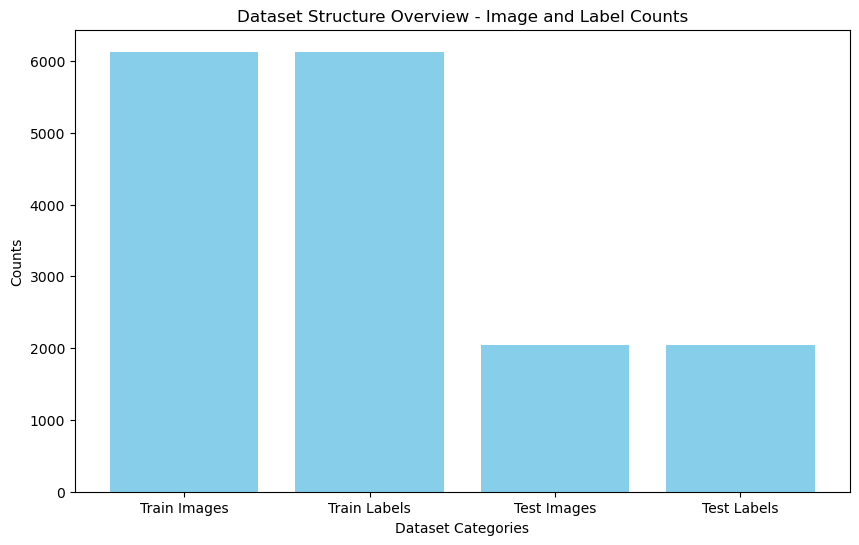

In [4]:
categories = ['Train Images', 'Train Labels', 'Test Images', 'Test Labels']
counts = [train_image_count, train_label_count, test_image_count, test_label_count]

# Plotting the data distribution
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.title("Dataset Structure Overview - Image and Label Counts")
plt.xlabel("Dataset Categories")
plt.ylabel("Counts")
plt.show()

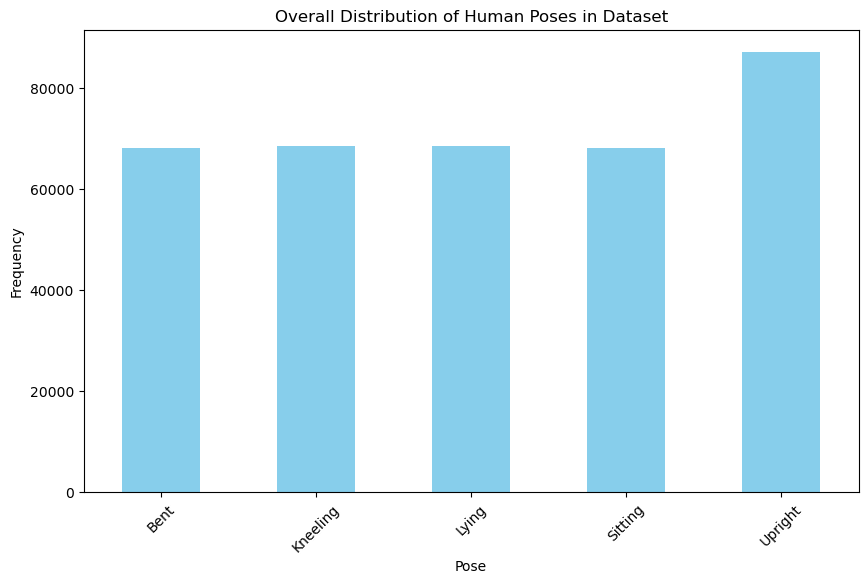

In [6]:
import glob

# Path to the directory containing all annotation txt files
label_folder_path = './archive (19)/C2A_Dataset/new_dataset3/All labels with Pose information/labels-2'

# Mapping of pose labels
pose_labels = {0: 'Bent', 1: 'Kneeling', 2: 'Lying', 3: 'Sitting', 4: 'Upright'}

# Initialize list to store pose information from all files
all_annotations = []

# Iterating through each .txt file in the specified folder
for file_path in glob.glob(os.path.join(label_folder_path, '*.txt')):
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            pose = int(values[5])  # Extracting the 6th value (pose)
            all_annotations.append(pose_labels[pose])

# Count the occurrences of each pose across all files
pose_counts = pd.Series(all_annotations).value_counts().sort_index()

# Plotting the overall distribution of poses
plt.figure(figsize=(10, 6))
pose_counts.plot(kind='bar', color='skyblue')
plt.title("Overall Distribution of Human Poses in Dataset")
plt.xlabel("Pose")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

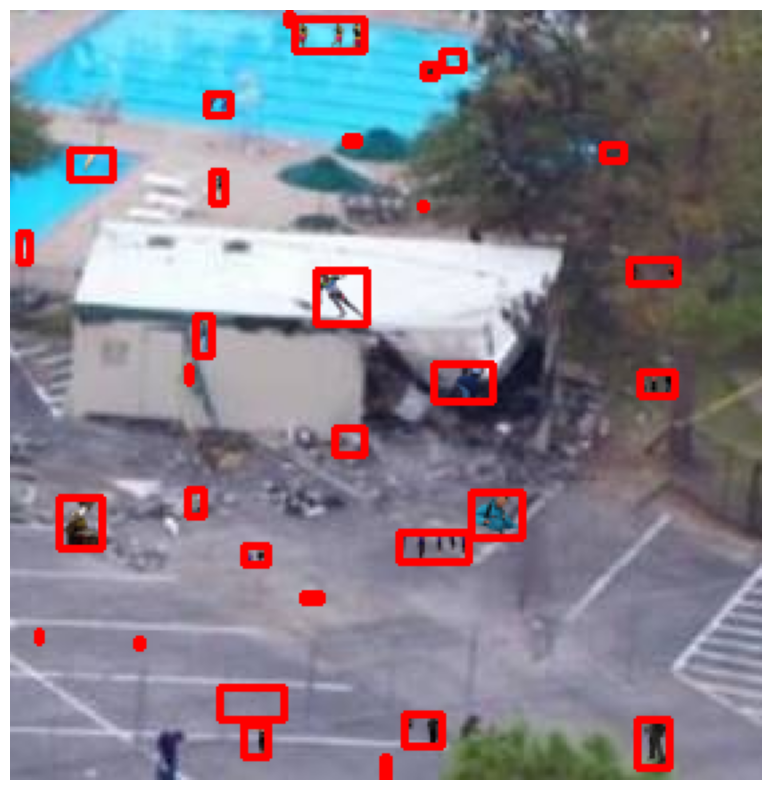

In [7]:
# Function to visualize YOLO annotations on images
def visualize_annotations(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Get image dimensions
    height, width, _ = image.shape
    
    # Open and read the annotation file
    with open(label_path, 'r') as file:
        for line in file.readlines():
            # Parse YOLO format annotation (class, x_center, y_center, width, height)
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

            # Convert normalized coordinates to pixel values
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            # Calculate top-left and bottom-right corners of the bounding box
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)

            # Draw the bounding box on the image
            image = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage

sample_image = os.path.join(train_image_folder, 'collapsed_building_image0001_0.png')
sample_label = os.path.join(train_label_folder, 'collapsed_building_image0001_0.txt')

visualize_annotations(sample_image, sample_label)

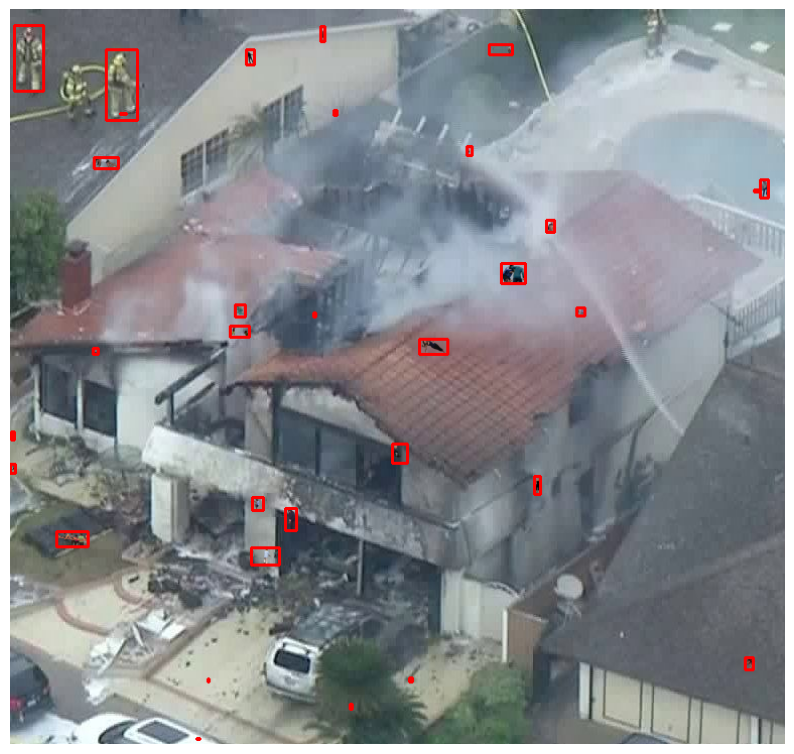

In [8]:
sample_image = os.path.join(train_image_folder, 'collapsed_building_image0002_0.png')
sample_label = os.path.join(train_label_folder, 'collapsed_building_image0002_0.txt')

visualize_annotations(sample_image, sample_label)

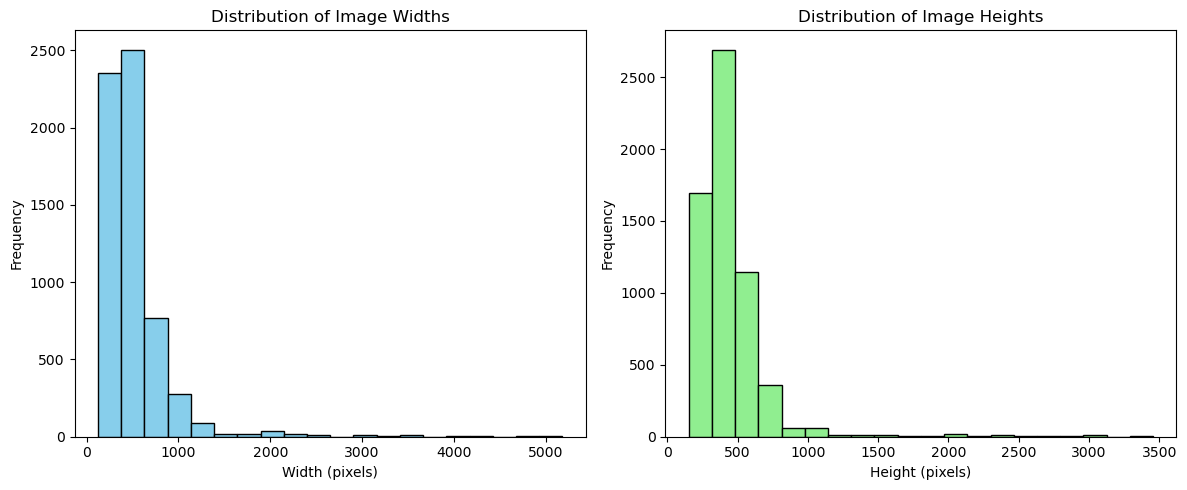

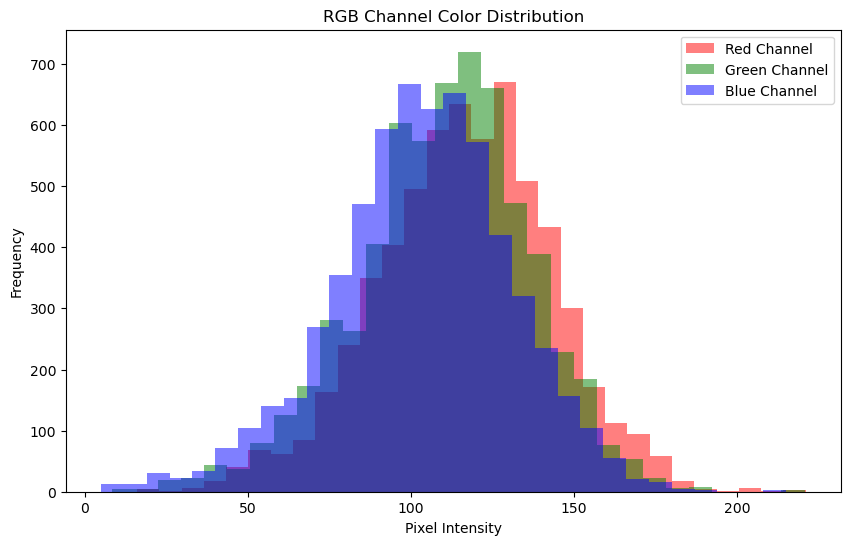

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the path to your image folder
image_folder_path = './archive (19)/C2A_Dataset/new_dataset3/train/images'

# Lists to store image resolutions and RGB channel data
resolutions = []
red_channel = []
green_channel = []
blue_channel = []

# Loop through each image in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder_path, filename)
        with Image.open(image_path) as img:
            # Record the resolution (width, height) of each image
            resolutions.append(img.size)
            
            # Convert image to numpy array for RGB channel analysis
            img_array = np.array(img)
            if img_array.ndim == 3:  # Check if the image is RGB
                red_channel.append(np.mean(img_array[:, :, 0]))
                green_channel.append(np.mean(img_array[:, :, 1]))
                blue_channel.append(np.mean(img_array[:, :, 2]))

# Plotting Resolution Distribution
widths, heights = zip(*resolutions)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Image Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Image Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")88j8

plt.tight_layout()
plt.show()

# Plotting Color Distribution
plt.figure(figsize=(10, 6))
plt.hist(red_channel, bins=30, color='red', alpha=0.5, label='Red Channel')
plt.hist(green_channel, bins=30, color='green', alpha=0.5, label='Green Channel')
plt.hist(blue_channel, bins=30, color='blue', alpha=0.5, label='Blue Channel')
plt.title("RGB Channel Color Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


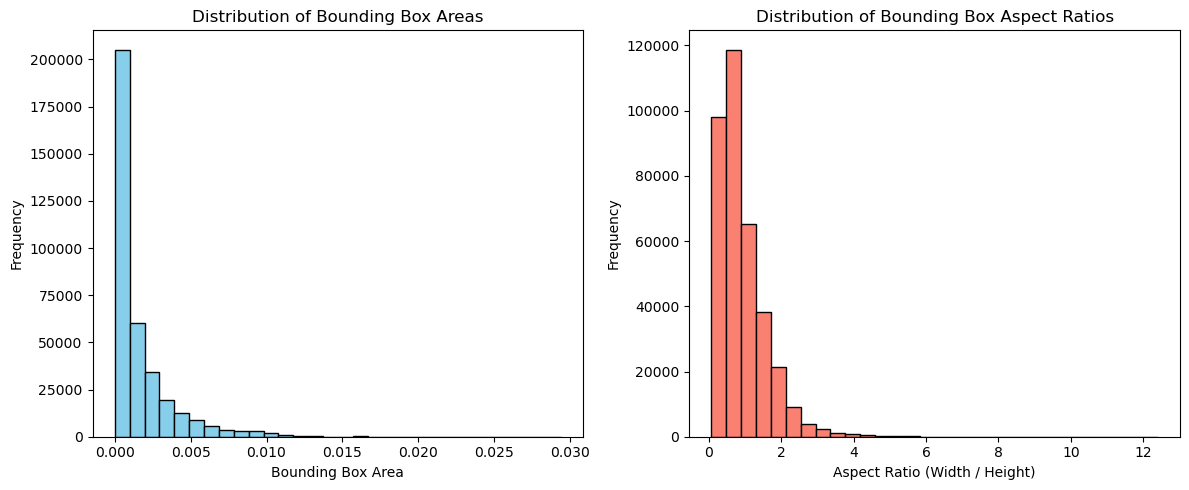

In [10]:
import os
import matplotlib.pyplot as plt

# Path to your label folder containing YOLO annotation files
label_folder_path = './archive (19)/C2A_Dataset/new_dataset3/All labels with Pose information/labels-2'

# Lists to store bounding box areas and aspect ratios
bounding_box_areas = []
aspect_ratios = []

# Loop through each annotation file
for filename in os.listdir(label_folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(label_folder_path, filename)
        
        with open(file_path, 'r') as file:
            for line in file:
                values = line.strip().split()
                # width and height are at index 3 and 4 in YOLO format
                width = float(values[3])
                height = float(values[4])
                
                # Calculate area and aspect ratio for each bounding box
                area = width * height
                aspect_ratio = width / height if height != 0 else 0  # Avoid division by zero
                
                bounding_box_areas.append(area)
                aspect_ratios.append(aspect_ratio)

# Plotting Bounding Box Area Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bounding_box_areas, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Bounding Box Area")
plt.ylabel("Frequency")

# Plotting Aspect Ratio Distribution
plt.subplot(1, 2, 2)
plt.hist(aspect_ratios, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Bounding Box Aspect Ratios")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Pixel Intensity Summary Statistics Across All Images:
       Mean Intensity  Median Intensity  Standard Deviation
count     6129.000000       6129.000000         6129.000000
mean       111.269232        109.091206           44.363882
std         25.859602         31.211319           12.292743
min         10.269985          1.000000           10.994080
25%         95.280781         89.000000           35.716441
50%        112.893170        111.000000           44.695588
75%        128.524522        130.000000           52.650950
max        220.155642        232.000000           84.429885


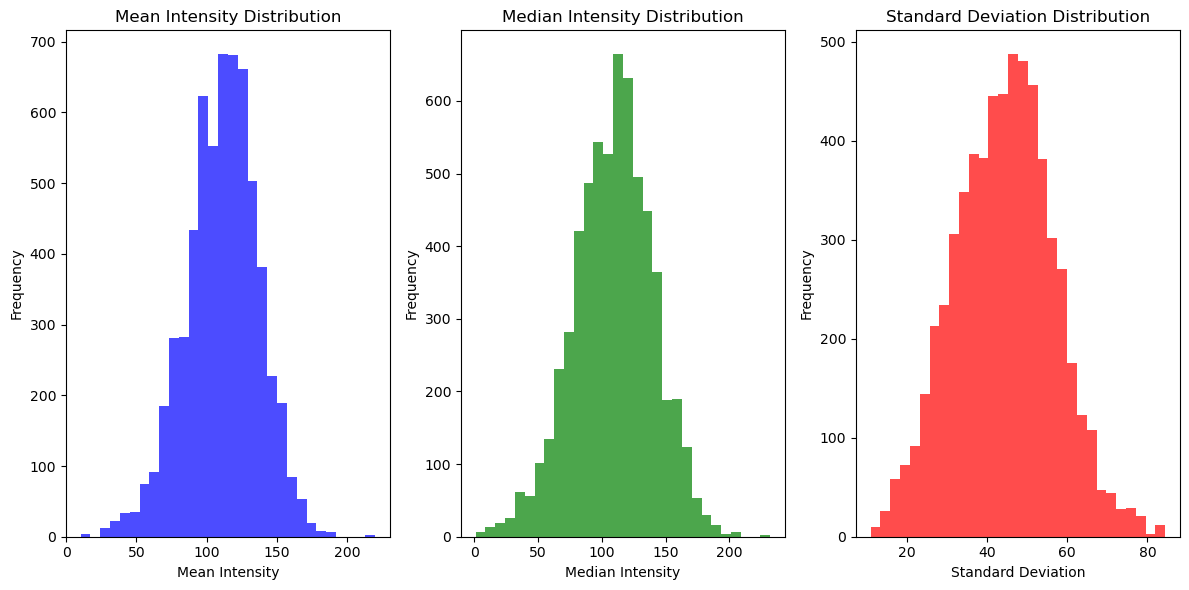

In [11]:
import os
from PIL import Image
import numpy as np
import pandas as pd

# Define the path to your image folder
image_folder_path = './archive (19)/C2A_Dataset/new_dataset3/train/images'

# Lists to store pixel statistics
means = []
medians = []
std_devs = []

# Loop through each image in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder_path, filename)
        
        with Image.open(image_path) as img:
            img = img.convert('L')  # Convert to grayscale to simplify intensity analysis
            img_array = np.array(img)
            
            # Calculate statistics for the image
            means.append(np.mean(img_array))
            medians.append(np.median(img_array))
            std_devs.append(np.std(img_array))

# Summarize statistics across all images
pixel_stats = pd.DataFrame({
    'Mean Intensity': means,
    'Median Intensity': medians,
    'Standard Deviation': std_devs
})

# Display the summary statistics
summary_stats = pixel_stats.describe()
print("Pixel Intensity Summary Statistics Across All Images:")
print(summary_stats)

# Plotting the distributions of mean, median, and standard deviation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Mean Intensity Distribution
plt.subplot(1, 3, 1)
plt.hist(means, bins=30, color='blue', alpha=0.7)
plt.title('Mean Intensity Distribution')
plt.xlabel('Mean Intensity')
plt.ylabel('Frequency')

# Plot Median Intensity Distribution
plt.subplot(1, 3, 2)
plt.hist(medians, bins=30, color='green', alpha=0.7)
plt.title('Median Intensity Distribution')
plt.xlabel('Median Intensity')
plt.ylabel('Frequency')

# Plot Standard Deviation Distribution
plt.subplot(1, 3, 3)
plt.hist(std_devs, bins=30, color='red', alpha=0.7)
plt.title('Standard Deviation Distribution')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Bounding Box Coverage Summary:
{'Mean Coverage (%)': 5.686451554197188, 'Median Coverage (%)': 4.1710041342, 'Max Coverage (%)': 51.754333563299994, 'Min Coverage (%)': 0.017917410399999997}


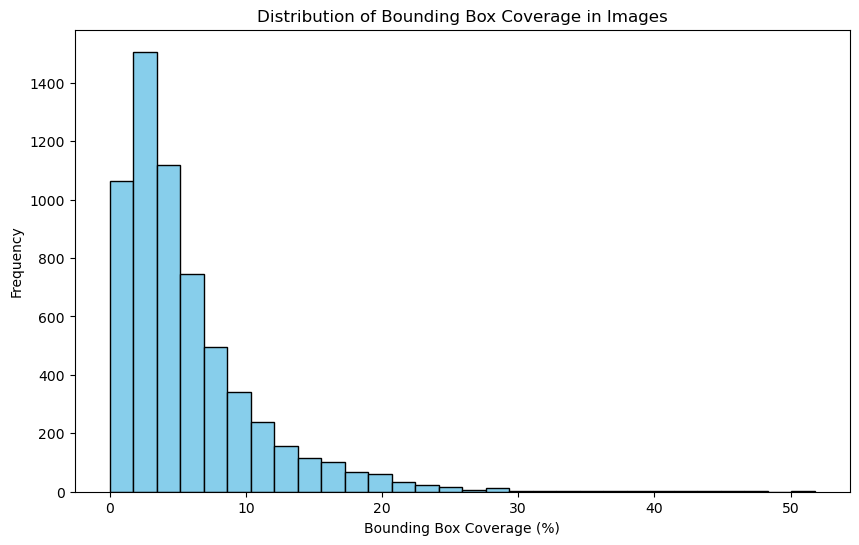

In [14]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define paths to your labels and images
label_folder_path = './archive (19)/C2A_Dataset/new_dataset3/All labels with Pose information/labels-2'
image_folder_path = './archive (19)/C2A_Dataset/new_dataset3/train/images'

# List to store the percentage area covered by bounding boxes in each image
coverage_percentages = []

# Loop through each annotation file
for label_file in os.listdir(label_folder_path):
    if label_file.endswith('.txt'):
        # Get corresponding image file name (assuming same base name)
        image_file = label_file.replace('.txt', '.png')  # or '.png' if images are in PNG format
        image_path = os.path.join(image_folder_path, image_file)
        
        # Load image to get its dimensions
        if os.path.exists(image_path):
            with Image.open(image_path) as img:
                img_width, img_height = img.size
                img_area = img_width * img_height

                # Read bounding boxes from label file
                total_bbox_area = 0
                label_path = os.path.join(label_folder_path, label_file)
                
                with open(label_path, 'r') as file:
                    for line in file:
                        values = line.strip().split()
                        # Width and height in YOLO format are relative to image dimensions
                        bbox_width = float(values[3]) * img_width
                        bbox_height = float(values[4]) * img_height
                        bbox_area = bbox_width * bbox_height
                        total_bbox_area += bbox_area
                
                # Calculate coverage percentage
                coverage_percentage = (total_bbox_area / img_area) * 100
                coverage_percentages.append(coverage_percentage)

# Display basic statistics on bounding box coverage
coverage_summary = {
    'Mean Coverage (%)': np.mean(coverage_percentages),
    'Median Coverage (%)': np.median(coverage_percentages),
    'Max Coverage (%)': np.max(coverage_percentages),
    'Min Coverage (%)': np.min(coverage_percentages)
}
print("Bounding Box Coverage Summary:")
print(coverage_summary)

# Plotting the coverage distribution
plt.figure(figsize=(10, 6))
plt.hist(coverage_percentages, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Bounding Box Coverage in Images")
plt.xlabel("Bounding Box Coverage (%)")
plt.ylabel("Frequency")
plt.show()
